# Dataset Overview #

### Understanding the Problem ###
Our project involves the classification of images into classes based on the location they depict. The dataset contains thousands of images belonging to 6 distinct classes: buildings, forest, glacier, mountain, sea, and street. These class labels are given for the images in the training dataset, and by listing a few samples from each class, we can obtain an overall understanding of the problem structure and the project's main objectives.

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


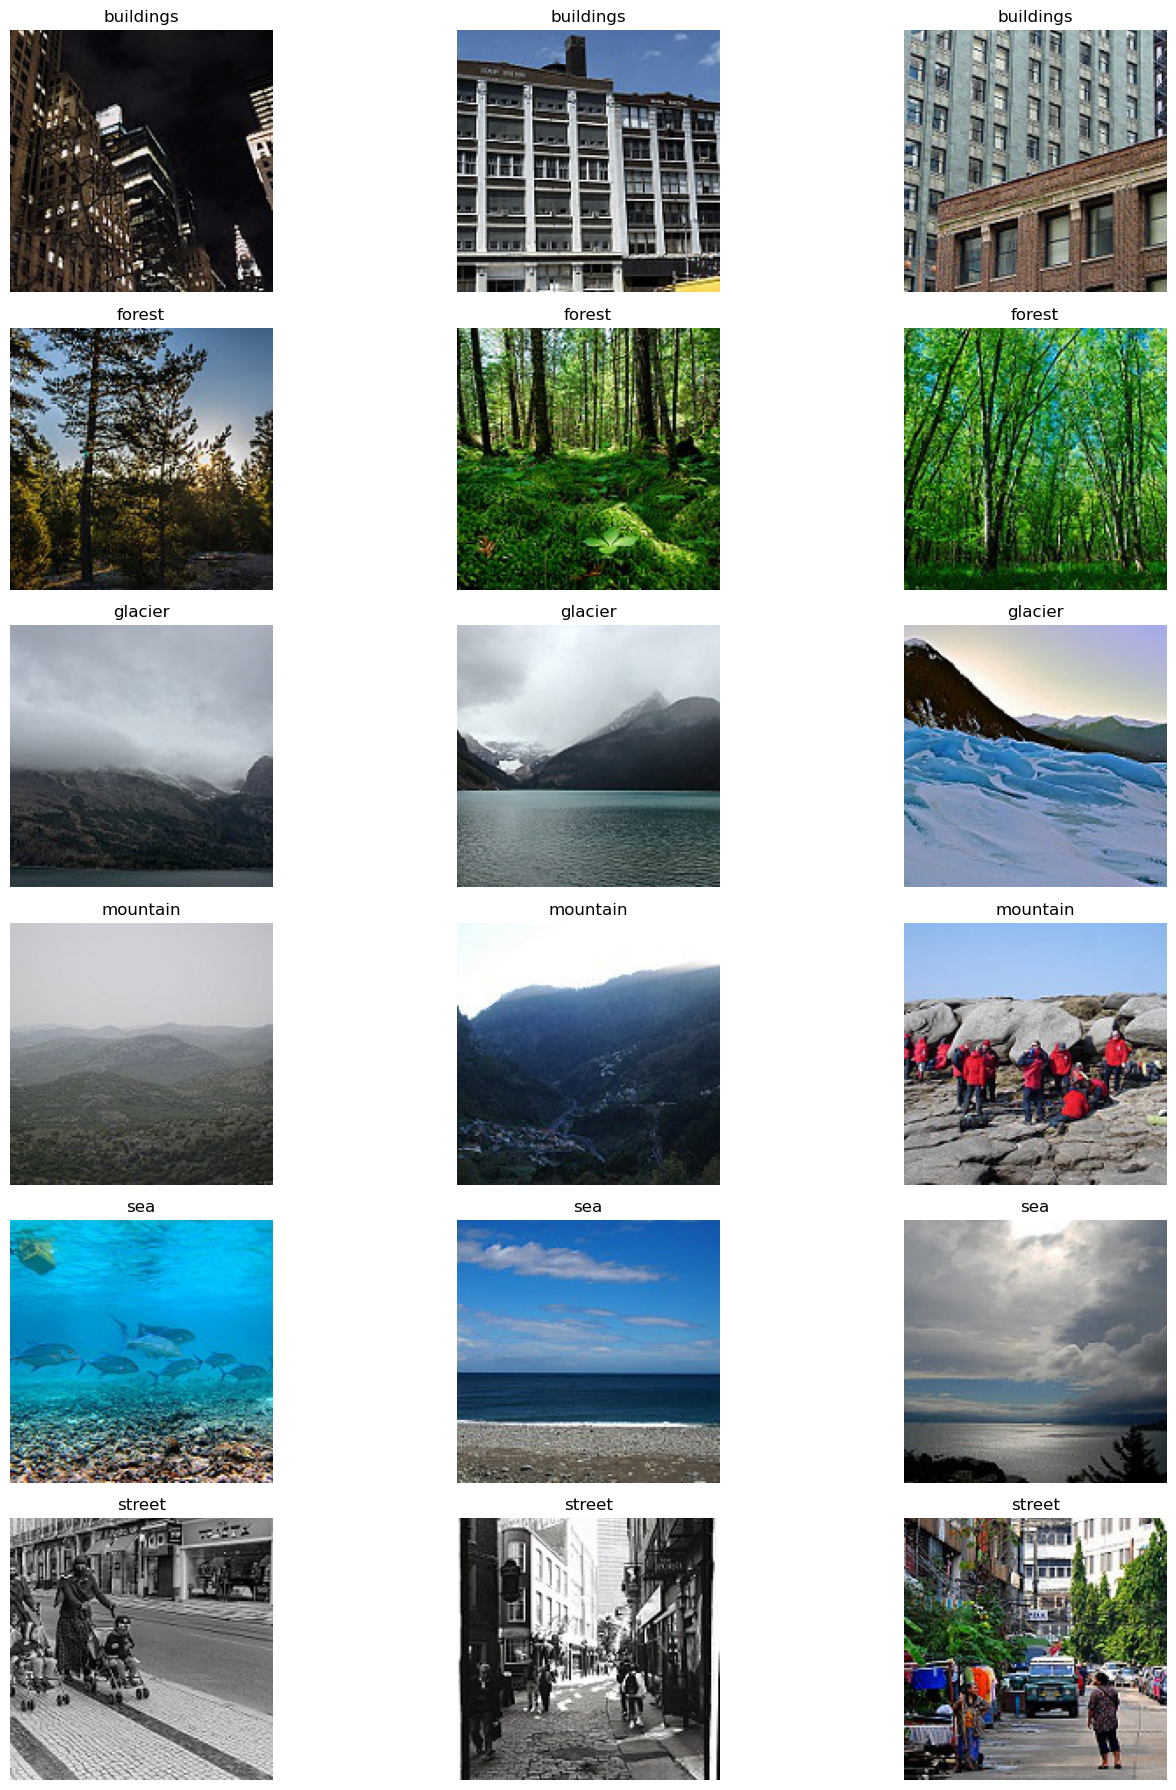

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from collections import Counter
import seaborn as sns

path = '/Users/jasonzhao/Documents/171project/inteldata/seg_train/seg_train'
#stores list of folders in this path in alph order
classes = sorted(os.listdir(path))

#remove this metadata file from classes
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
print(classes)
def plot_images(datasetPath, classes, samples_per_class=3):
    plt.figure(figsize=(15,len(classes)*3))
    for i, class_name in enumerate(classes):
        # navigate to each class
        class_folder = os.path.join(path,class_name)
        #list of selected sample of images in the folder
        image_files = os.listdir(class_folder)[:samples_per_class]
        for j, image_name in enumerate(image_files):
            img_path = os.path.join(class_folder, image_name)
            #opens image file
            image = Image.open(img_path)
            #rows,cols, idx placement of image
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
            #displays the image
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(path, classes)
            

        
    
    

# Dataset Structure and Distribution #

### Data Formatting ###
In the dataset overview, we observed that most of the images are of the same size (150x150x3). In other words, the majority of the dataset is formatted the same: 150x150 images with 3 channels for red, green, and blue (RGB). Thus, we decided to use these images as the "default" format for pre-processing. We convert each image into a usable data point by flattening it into a 1D vector of its RGB values.

- **`X`** is your **feature matrix**. It’s a NumPy array of shape `(N, 67500)`, where:
  - **`N`** is the total number of images you loaded.  
  - **`67500`** comes from flattening each `150×150×3` RGB image into a one-dimensional vector (`150 × 150 × 3 = 67500`).  
  - **Each row** of `X` corresponds to one image and contains its pixel values in the order:  
    ```
    [R₁, G₁, B₁, R₂, G₂, B₂, …, Rₙ, Gₙ, Bₙ]
    ```  
    where each triplet is the red, green, blue channels of a single pixel.

- **`y`** is your **label vector**. It’s a NumPy array of shape `(N,)`, where each entry is an integer in `[0…5]` indicating which class that image belongs to:
  - For example, if  
    ```python
    classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    ```  
    then a `y` value of `2` means “glacier.”

---

So in effect, you have one flattened feature vector per image in `X`, and the matching class index in `y`. Together, `(X[i], y[i])` is the feature–label pair you’ll feed into your Logistic Regression or MLP models.  

### Outliers and Special Cases ###
Although most images in the training set follow the 150x150x3 format, not all of them do. It is very important to identify any such images, as they must be resized during pre-processing. If not, this would lead to data points with the incorrect dimensions. For example, a rectangular 150x100x3 image flattens out into a 45000-feature input vector, while a grayscale 150x150x1 image flattens out into 22500-feature input vector. Both of these cases would cause the feature matrix – and the entire classification process – to crash due to a shape mismatch. To prevent this, we list out every unique image size in the training set and identify any images that will require special handling.

In [ ]:
# Create flattened arrays (We will be using this for MLP and Logistic Regression models):
# Remember, we do not have all of the same sized images (150 x 150). So we will have to resize all of the images to 150 x 150  pixels. 

# Find out which of the images do not have consistent sizes:

from collections import Counter
shape_counts = Counter()

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    for fname in os.listdir(cls_path):
        img = Image.open(os.path.join(cls_path, fname)).convert("RGB")
        shape_counts[img.size + (len(img.getbands()),)] += 1  # (width, height, channels)

print("Image shapes and their counts:")
for shape, cnt in shape_counts.items():
    print(f"  {shape}: {cnt}")

Image shapes and their counts:
  (150, 150, 3): 13986
  (150, 124, 3): 1
  (150, 115, 3): 1
  (150, 108, 3): 2
  (150, 136, 3): 2
  (150, 135, 3): 3
  (150, 133, 3): 1
  (150, 113, 3): 7
  (150, 111, 3): 3
  (150, 134, 3): 2
  (150, 142, 3): 2
  (150, 149, 3): 1
  (150, 76, 3): 1
  (150, 123, 3): 2
  (150, 105, 3): 1
  (150, 102, 3): 1
  (150, 143, 3): 2
  (150, 146, 3): 2
  (150, 120, 3): 1
  (150, 110, 3): 1
  (150, 97, 3): 1
  (150, 119, 3): 1
  (150, 147, 3): 1
  (150, 103, 3): 1
  (150, 131, 3): 1
  (150, 144, 3): 2
  (150, 100, 3): 1
  (150, 81, 3): 1
  (150, 141, 3): 1
  (150, 145, 3): 1
  (150, 140, 3): 1


### Class Distribution ###
It is also advisable to perform an analysis on the training set's demographics. It is important to check that no image class has significantly more instances than any of the others. If an image classifier is trained too heavily on one class of image, unnecessary bias can be introduced. The class distribution, seen below, shows that there are no significant differences in the number of images in each class. We may therefore use the full dataset when training our models.

/var/folders/jk/dfnkht451fbbbc3v23fdkfz80000gn/T/ipykernel_70653/4176027480.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Class', y='Image Count', palette='viridis')


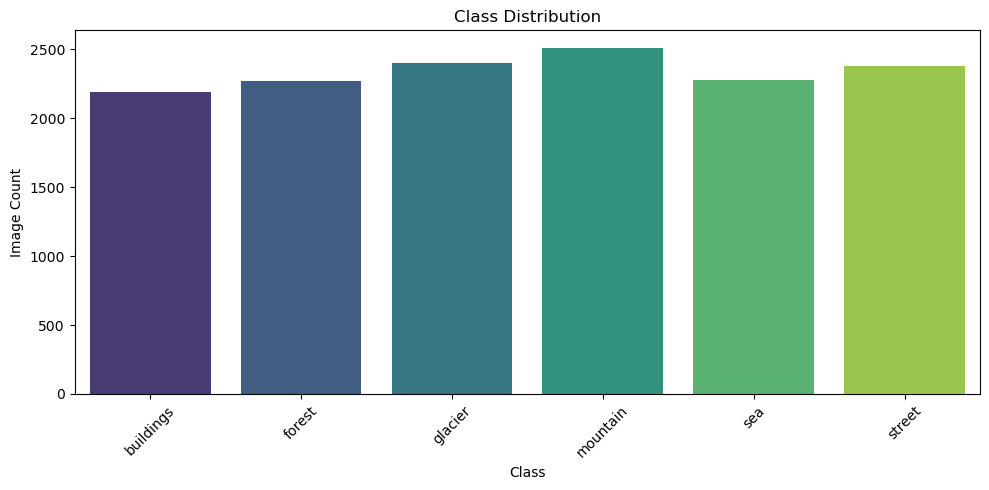

       Class  Image Count
0  buildings         2191
1     forest         2271
2    glacier         2404
3   mountain         2512
4        sea         2274
5     street         2382


In [ ]:
def get_class_distribution(dataset_path, classes):
    class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
    df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='Class', y='Image Count', palette='viridis')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

distribution_df = get_class_distribution(path, classes)
print(distribution_df)

### Pre-Processing ###
Now that we have resolved the dataset's structure and distribution, we proceed with building a pre-processing pipeline to convert the images into the feature matrix ```X``` and the label vector ```y```. As previously mentioned, we first identify any images that do not follow the default 150x150x3 format and resize them to do so. This will ensure that all feature vectors in ```X``` are of the same length, preventing shape mismatches.

In [ ]:
# As we can see above, we have some images not of size 150x150. 
# We resize the above outlier images to 150x150, so that we can compress it to RGB 1D arrays.

import os
from PIL import Image

target_size = (150, 150)

for root, dirs, files in os.walk(base_dir):
    for fname in files:
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        img_path = os.path.join(root, fname)
        img = Image.open(img_path).convert('RGB')
        if img.size != target_size:
            # Use LANCZOS resampling instead of ANTIALIAS
            img = img.resize(target_size, resample=Image.LANCZOS)
            img.save(img_path)

print("All images resized to 150×150.")

All images resized to 150×150.


In [ ]:
## Lets check if all the images are of the same size:

shape_counts = Counter()

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    for fname in os.listdir(cls_path):
        img = Image.open(os.path.join(cls_path, fname)).convert("RGB")
        shape_counts[img.size + (len(img.getbands()),)] += 1  # (width, height, channels)

print("Image shapes and their counts:")
for shape, cnt in shape_counts.items():
    print(f"  {shape}: {cnt}")

Image shapes and their counts:
  (150, 150, 3): 14034


Now that these special cases have been handled, we flatten the images in the training set into their corresponding 67500-feature input vectors and join them together to form the feature matrix ```X```. We then take each image's class label (again, the classes are known in the training set) and join them together to form the label vector ```y```. We now have a feature-label pair ```(X[i], y[i])``` for every image in the training set, upon which we may train our image classification models.

In [ ]:
# 3. Initialize lists for feature vectors and labels
X = []
y = []

# 4. Loop through each class folder and each image file
for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    for fname in os.listdir(cls_path):
        if not fname.lower().endswith((".jpg", ".jpeg", ".png")):
            continue
        img_path = os.path.join(cls_path, fname)
        img = Image.open(img_path).convert("RGB")
        # Convert to numpy array and flatten to 1D vector
        arr = np.array(img)               # shape: (150, 150, 3)
        X.append(arr.flatten())           # shape: (67500,)
        y.append(classes.index(cls))

# 5. Convert lists to numpy arrays
X = np.stack(X)  # shape: (N_samples, 67500)
y = np.array(y)  # shape: (N_samples,)

# 6. Display shapes
print(f"Feature matrix X shape: {X.shape}")
print(f"Label vector y shape: {y.shape}")

Feature matrix X shape: (14034, 67500)
Label vector y shape: (14034,)


# RGB and Vibrance Analysis #

### Understanding RGB and Vibrance ###
In most digital images, the color of each pixel is determined by 3 RGB values, corresponding to the amount of red, green, and blue light to display. The mean of the 3 RGB values determines the overall intensity of the pixel to the viewing eye, which is known as vibrance. An image is comprised of 3 color channels corresponding to red, green, and blue. By isolating each of these channels, we can see only the red, green, or blue light in an image. Both the vibrance and the relative intensity of the color channels in an image can lend some interesting insight into what class the image might belong to.

Image type: Buildings
Image size: (150, 150, 3)


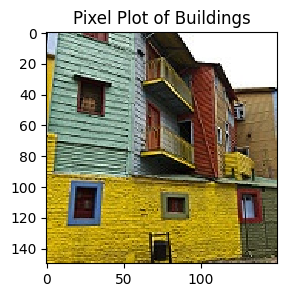

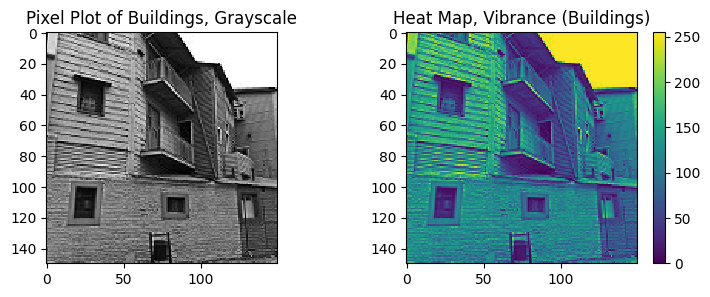

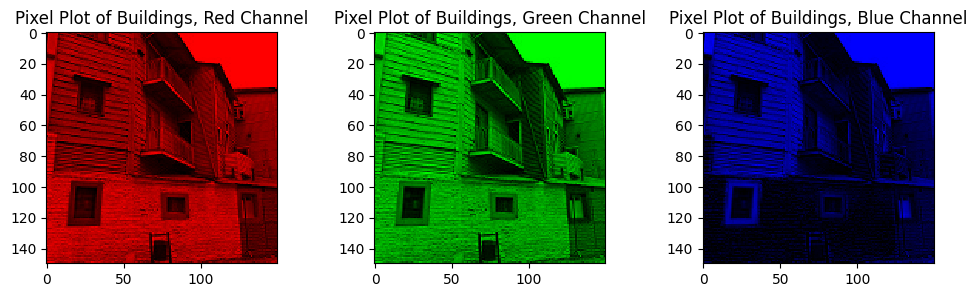

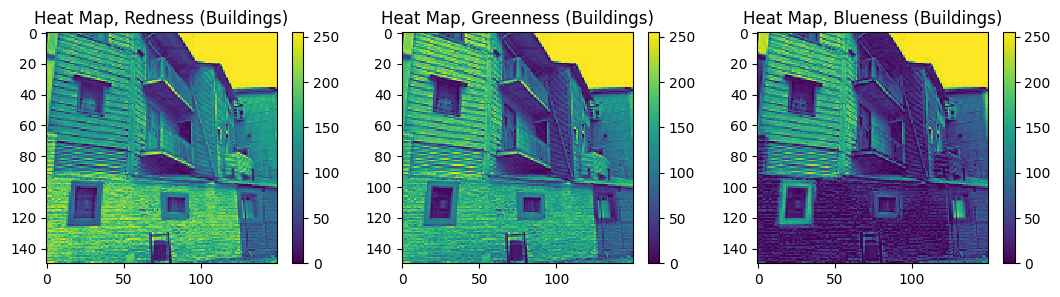

Image type: Forest
Image size: (150, 150, 3)


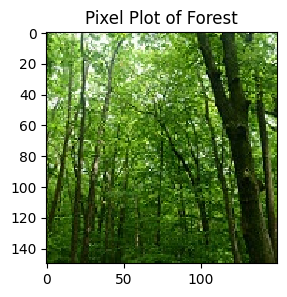

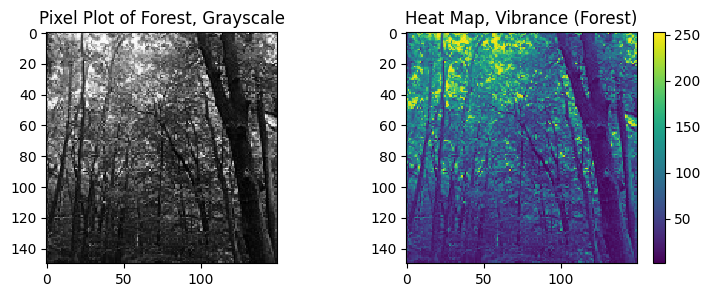

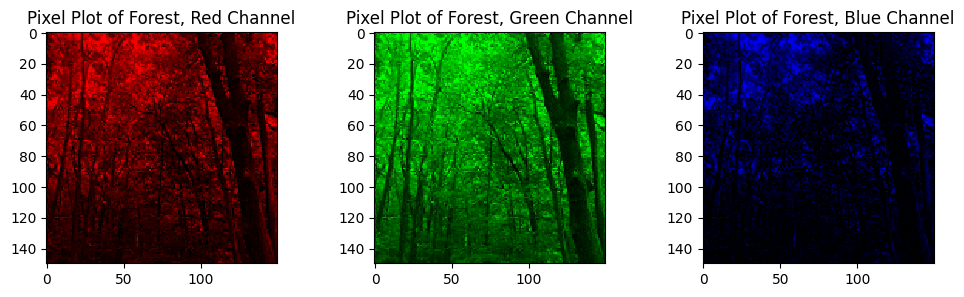

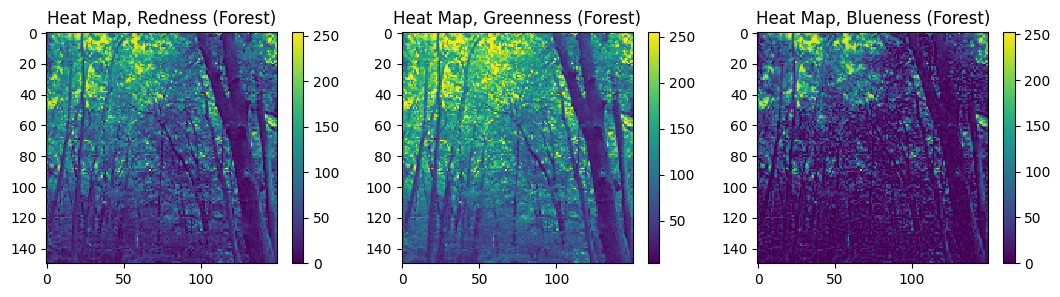

Image type: Glacier
Image size: (150, 150, 3)


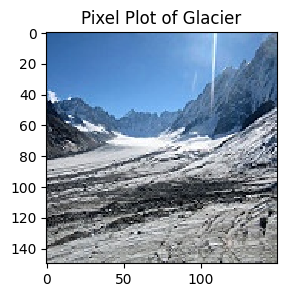

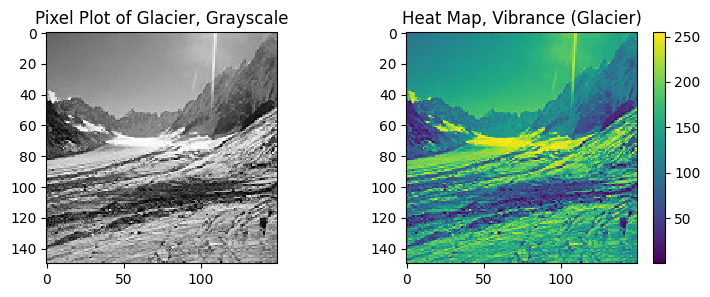

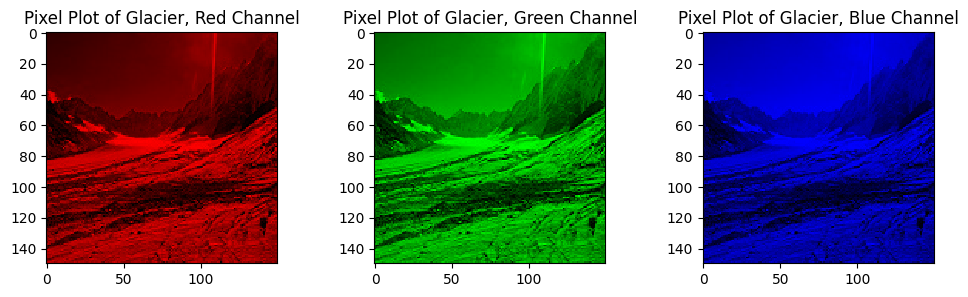

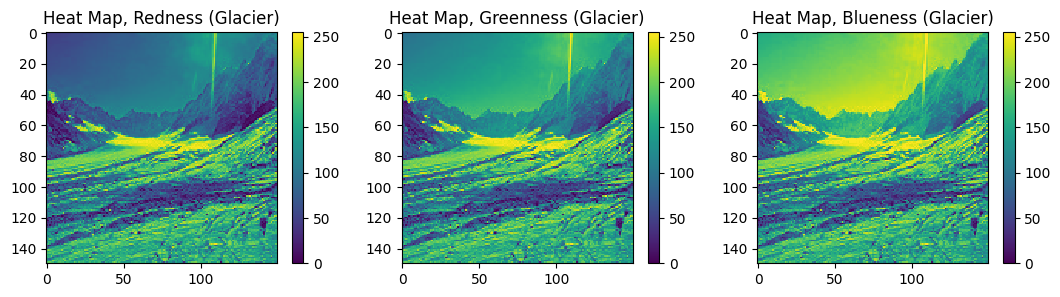

Image type: Mountain
Image size: (150, 150, 3)


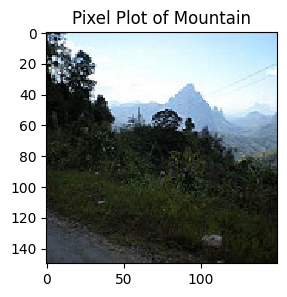

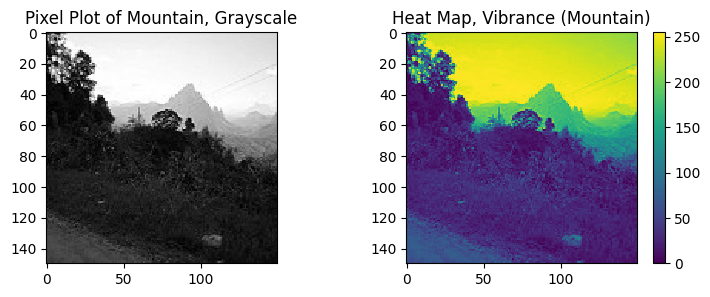

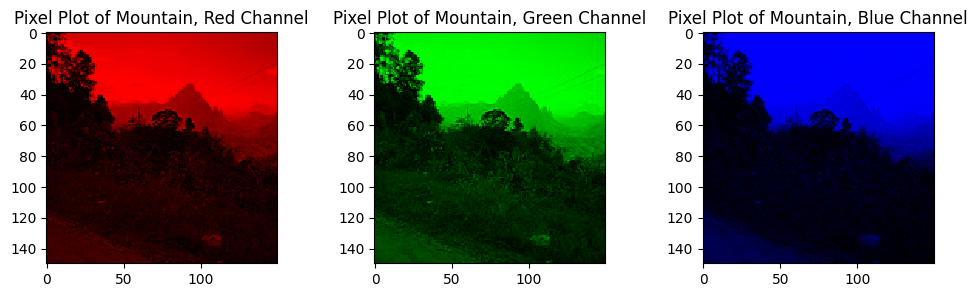

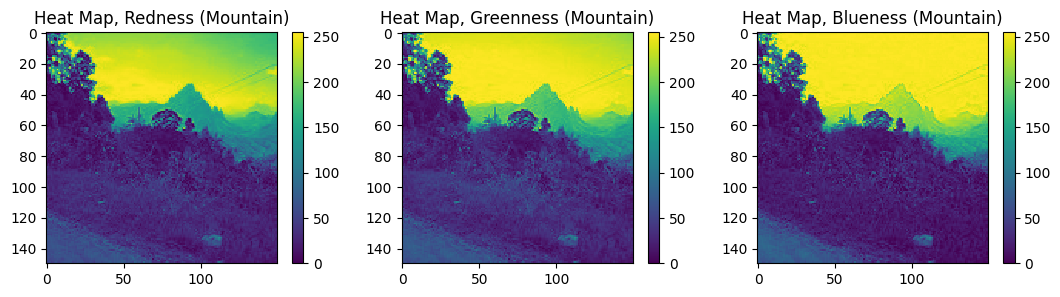

Image type: Sea
Image size: (150, 150, 3)


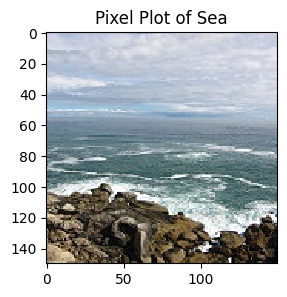

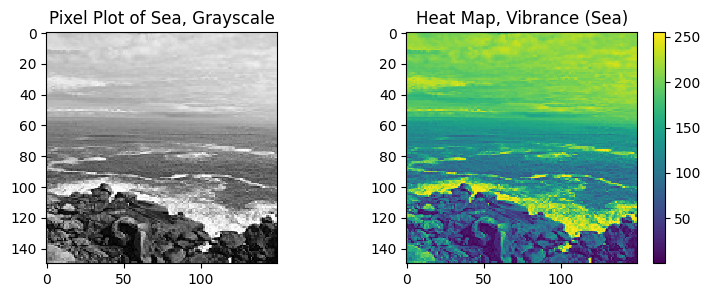

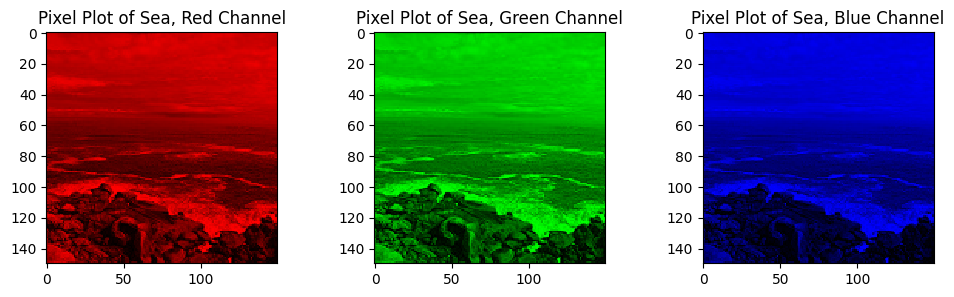

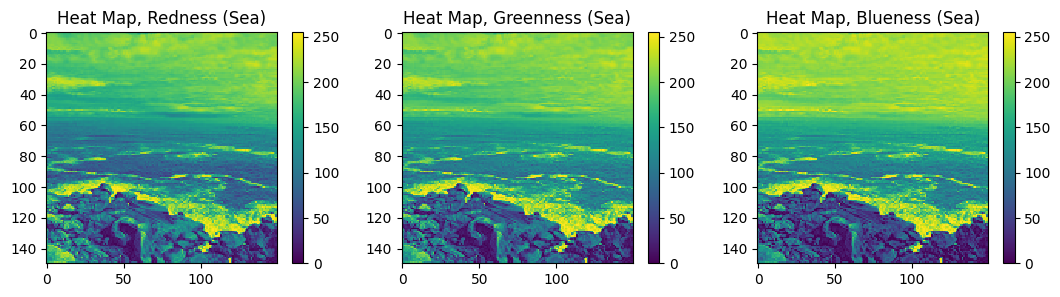

Image type: Street
Image size: (150, 150, 3)


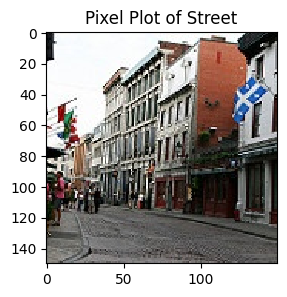

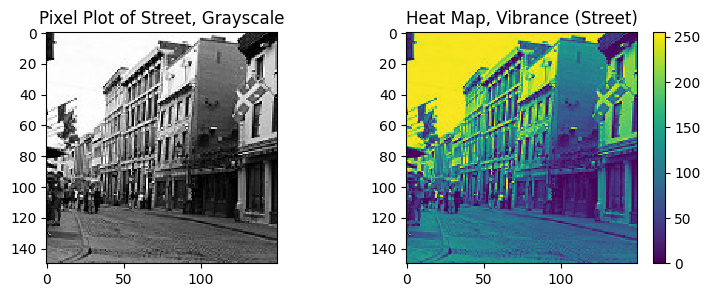

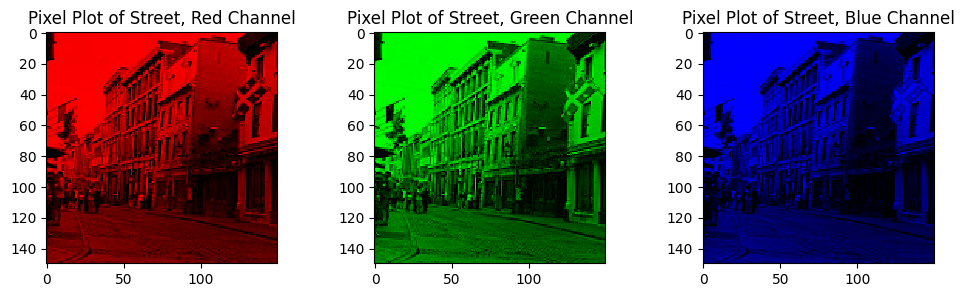

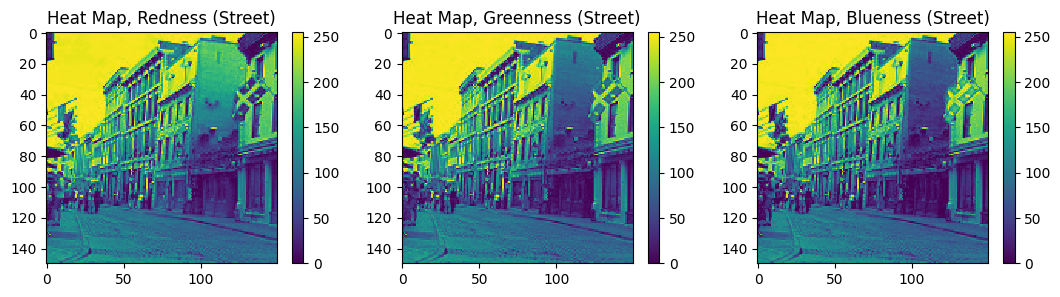

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns

path = "intel-data/seg_train/seg_train"

def image_analysis(image_path, image_type):
    image = mpimg.imread(image_path)
    print("Image type:", image_type)
    print("Image size:", image.shape)

    plt.figure(figsize=(5, 3))
    plt.imshow(image, interpolation='nearest')
    plt.title('Pixel Plot of ' + image_type)
    plt.show()
    
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 2, 1)
    gray_image = np.mean(image, axis=2)
    plt.imshow(gray_image, interpolation='nearest', cmap='gray')
    plt.title('Pixel Plot of ' + image_type + ', Grayscale')
    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, interpolation='nearest')
    plt.title('Heat Map, Vibrance (' + image_type + ')')
    plt.colorbar()
    plt.show()
    
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    red_image = image.copy()
    red_image[:, :, 1] = 0
    red_image[:, :, 2] = 0
    plt.imshow(red_image, interpolation='nearest')
    plt.title('Pixel Plot of ' + image_type + ', Red Channel')
    plt.subplot(1, 3, 2)
    green_image = image.copy()
    green_image[:, :, 0] = 0
    green_image[:, :, 2] = 0
    plt.imshow(green_image, interpolation='nearest')
    plt.title('Pixel Plot of ' + image_type + ', Green Channel')
    plt.subplot(1, 3, 3)
    blue_image = image.copy()
    blue_image[:, :, 0] = 0
    blue_image[:, :, 1] = 0
    plt.imshow(blue_image, interpolation='nearest')
    plt.title('Pixel Plot of ' + image_type + ', Blue Channel')
    plt.show()

    plt.figure(figsize=(13, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(image[:, :, 0], interpolation='nearest')
    plt.title('Heat Map, Redness (' + image_type + ')')
    plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.imshow(image[:, :, 1], interpolation='nearest')
    plt.title('Heat Map, Greenness (' + image_type + ')')
    plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.imshow(image[:, :, 2], interpolation='nearest')
    plt.title('Heat Map, Blueness (' + image_type + ')')
    plt.colorbar()
    plt.show()

image_analysis(path + "/buildings/4.jpg", "Buildings")
image_analysis(path + "/forest/8.jpg", "Forest")
image_analysis(path + "/glacier/10.jpg", "Glacier")
image_analysis(path + "/mountain/16.jpg", "Mountain")
image_analysis(path + "/sea/7.jpg", "Sea")
image_analysis(path + "/street/9.jpg", "Street")

We can observe some rough trends from these pixel plots of RGB and vibrance, especially when taking preexisting domain knowledge into consideration.
- Forest images may have more green (due to the plants and trees) and less vibrance and blue (due to the trees blocking out the sky).
- Glacier images may have more vibrance and less contrast between color channels, because they are white in color (red, green, and blue all at maximum).
- Mountain images may show a gradient in vibrance from bottom to top, where the darker colors of the mountain rock give way to the brighter shade of the sky.
- Sea images may have more blue, for obvious reasons.
- Buildings and street images may have a sharp contrast between color channels (for example, a lot of red and almost no blue) because they tend to contain bright, unnatural colors.

Of course, not all images in each class will follow these trends, but this analysis is a basic proof of concept of how images could be classified according to their RGB values.

### Statistical Trends in RGB and Vibrance ###
A more mathematically robust insight into RGB-related trends can be derived from statistical analysis. One of the easy places to start would be the mean and standard deviation of red, green, and blue across all images in one class. By plotting these values for each class, we can observe some more general patterns about RGB values compared to the semantic analysis from earlier.

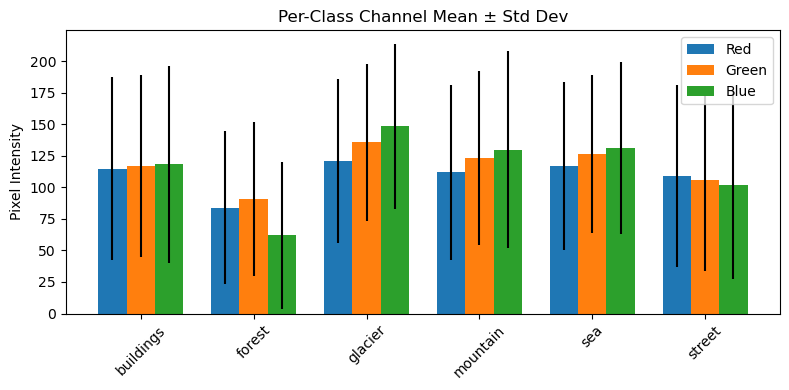

In [ ]:
# Precompute channel slices
R = X[:, 0::3]
G = X[:, 1::3]
B = X[:, 2::3]

means = {'R': [], 'G': [], 'B': []}
stds  = {'R': [], 'G': [], 'B': []}

for i, cls in enumerate(classes):
    idx = np.where(y == i)
    means['R'].append(R[idx].mean())
    means['G'].append(G[idx].mean())
    means['B'].append(B[idx].mean())
    stds ['R'].append(R[idx].std())
    stds ['G'].append(G[idx].std())
    stds ['B'].append(B[idx].std())

# Plotting
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x - width, means['R'], width, yerr=stds['R'], label='Red')
ax.bar(x        , means['G'], width, yerr=stds['G'], label='Green')
ax.bar(x + width, means['B'], width, yerr=stds['B'], label='Blue')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.set_ylabel("Pixel Intensity")
ax.set_title("Per-Class Channel Mean ± Std Dev")
ax.legend()
plt.tight_layout()
plt.show()

These bar plots help corroborate some of the earlier trends we observed:
- Forest images have less vibrance, with green being the most prominent color and blue being the least prominent.
- Glacier images have more vibrance.
- Buildings and street images have the highest proportion of red. This makes sense, as red is generally not a common color in natural settings.
- Buildings and street images also have the highest variance across all color channels, which is also reasonable, given that they tend to encompass a much wider range of colors than natural settings.

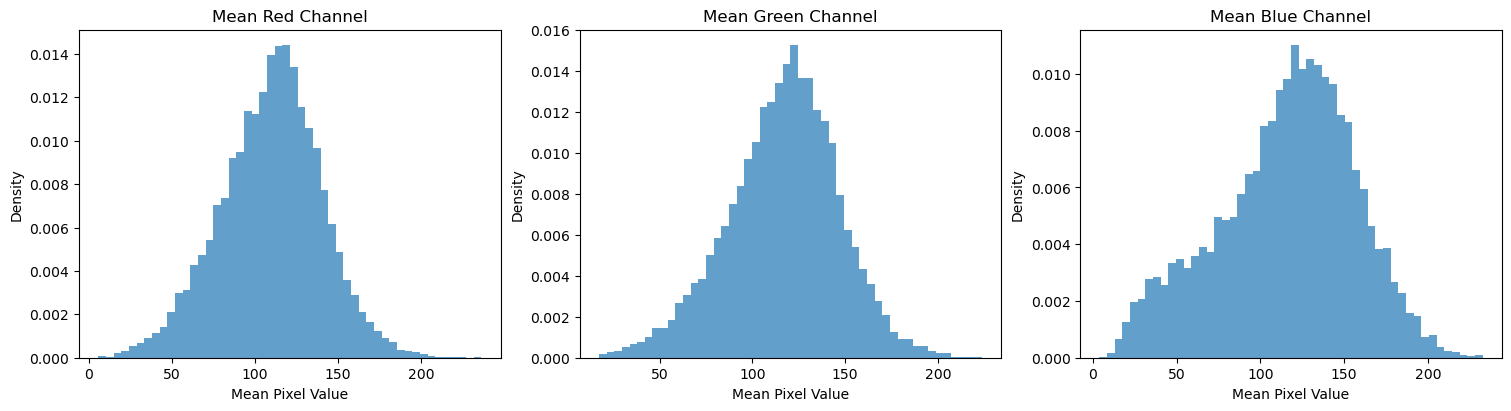

/Users/saiganesh/miniconda3/envs/cenv4py310/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


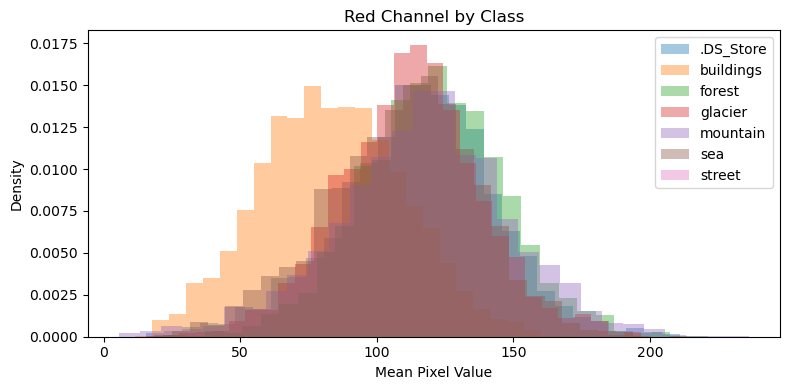

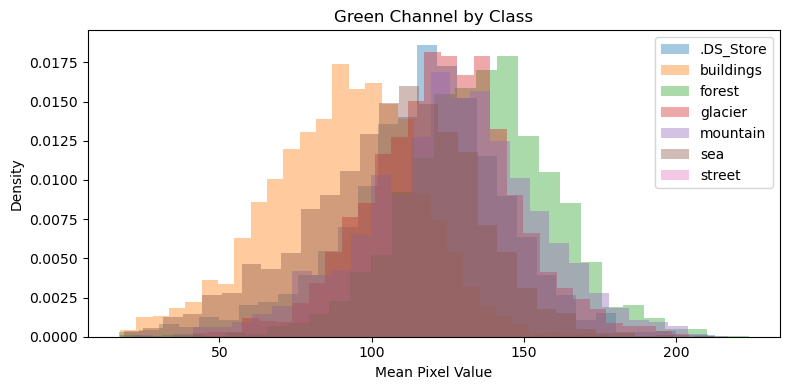

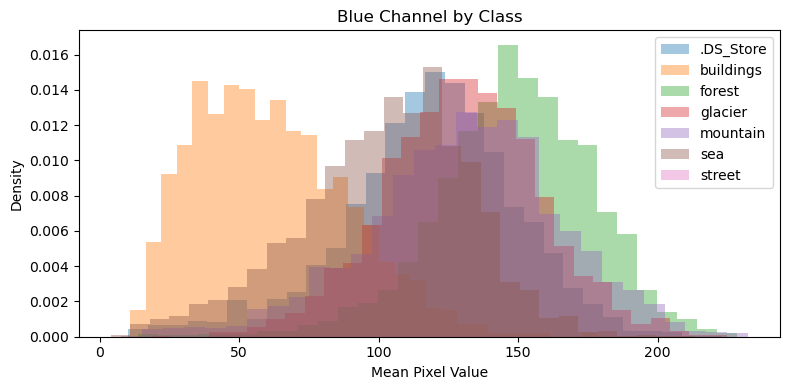

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Reshape X back into image form ---
# X.shape == (N_samples, 67500)
N = X.shape[0]
images = X.reshape(N, 150, 150, 3)  # (N, height, width, channels)

# --- 2) Compute per-image mean for each channel ---
mean_R = images[:, :, :, 0].mean(axis=(1, 2))  # shape: (N,)
mean_G = images[:, :, :, 1].mean(axis=(1, 2))
mean_B = images[:, :, :, 2].mean(axis=(1, 2))

# --- 3) Plot overall channel distributions ---
fig, ax = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
for subplot, data, color in zip(
    ax, [mean_R, mean_G, mean_B], ['Red','Green','Blue']
):
    subplot.hist(data, bins=50, density=True, alpha=0.7)
    subplot.set_title(f"Mean {color} Channel")
    subplot.set_xlabel("Mean Pixel Value")
    subplot.set_ylabel("Density")
plt.show()

# --- 4) (Optional) Per-class overlay histograms ---
for channel_data, channel_name in [(mean_R, 'Red'), (mean_G, 'Green'), (mean_B, 'Blue')]:
    plt.figure(figsize=(8,4))
    for idx, cls in enumerate(classes):
        # select all images of class idx
        vals = channel_data[y == idx]
        plt.hist(vals, bins=30, density=True, alpha=0.4, label=cls)
    plt.title(f"{channel_name} Channel by Class")
    plt.xlabel("Mean Pixel Value")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

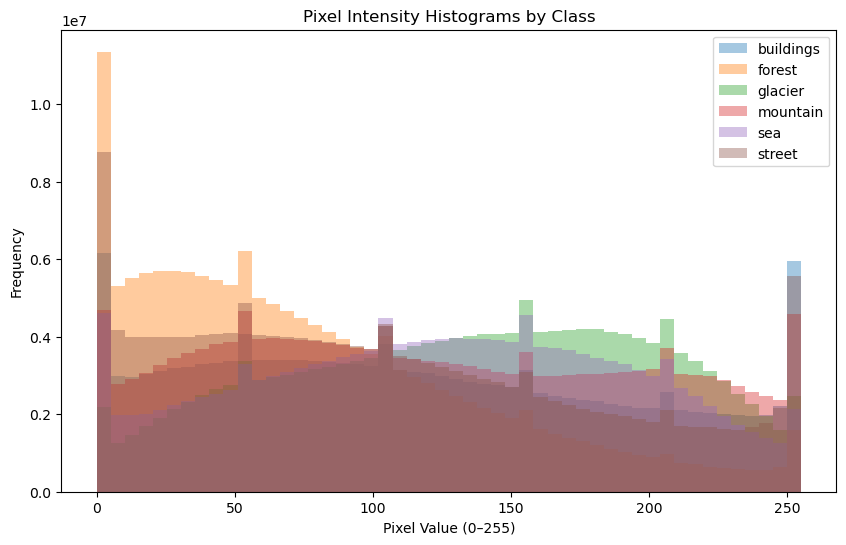

In [ ]:
plt.figure(figsize=(10,6))
for i, cls in enumerate(classes):
    pixels = np.hstack([R[y==i], G[y==i], B[y==i]]).ravel()
    plt.hist(pixels, bins=50, alpha=0.4, label=cls)
plt.xlabel("Pixel Value (0–255)")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Histograms by Class")
plt.legend()
plt.show()

Histograms like the ones above are also useful for creating a better visualization of trends between classes. From these, we can observe some other trends that were not immediately obvious from the bar plot:
- Blue light tends to vary more widely across all images.
- Red light is lower and varies less across all images.
- Glacier images are skewed towards higher vibrance.
- Forest images are skewed heavily towards lower vibrance.
- Buildings and street images have a wide range of vibrance.

And so on. These RGB-related trends show the numerical patterns in the image data that a classification model might pick up on during training, and by conducting statistical analysis on RGB values, we are able to achieve a more complete understanding of this process.